In [32]:
!pip install scikit-learn
!pip install kaggle

In [21]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression -p ./data

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0




  0%|          | 0.00/457 [00:00<?, ?B/s]
100%|##########| 457/457 [00:00<00:00, 457kB/s]


In [23]:
import zipfile
import pandas as pd

In [30]:
zip_path = './data/salary-dataset-simple-linear-regression.zip'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('./data')
else:
    print("Arquivo ZIP não encontrado. Baixe antes de extrair.")

In [31]:
import os
print(os.listdir('./data'))

['salary-dataset-simple-linear-regression.zip', 'Salary_dataset.csv']


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

In [33]:
df = pd.read_csv('./data/Salary_dataset.csv')

In [34]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [36]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


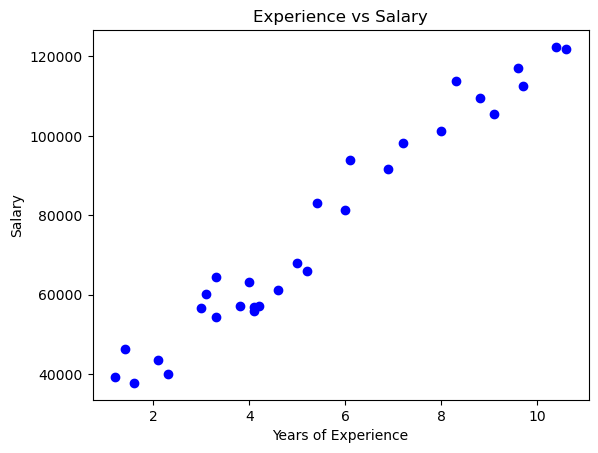

In [37]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

In [38]:
X = df[['YearsExperience']]
y = df['Salary'] 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_pred = model.predict(X_test)

In [42]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
27,112636.0,115791.210113
15,67939.0,71499.278095
23,113813.0,102597.868661
17,83089.0,75268.804224
8,64446.0,55478.792045
9,57190.0,60190.699707


In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 49830096.86
R² Score: 0.90


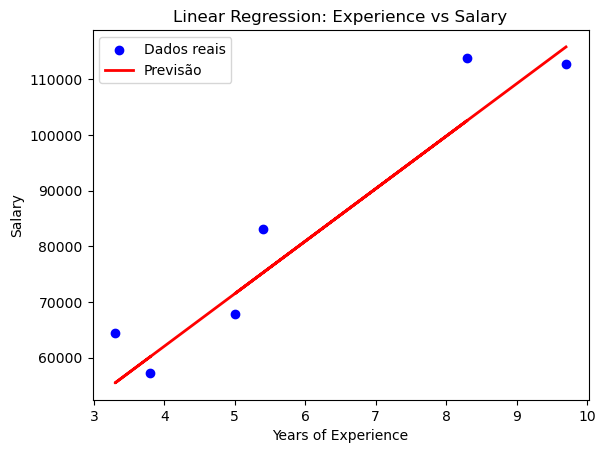

In [45]:
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsão')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Experience vs Salary')
plt.legend()
plt.show()